# Credit Card Fraud Detection
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [3]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
data = pd.read_csv('creditcard.csv')

In [7]:
print data.columns

Index([u'Time', u'V1', u'V2', u'V3', u'V4', u'V5', u'V6', u'V7', u'V8', u'V9',
       u'V10', u'V11', u'V12', u'V13', u'V14', u'V15', u'V16', u'V17', u'V18',
       u'V19', u'V20', u'V21', u'V22', u'V23', u'V24', u'V25', u'V26', u'V27',
       u'V28', u'Amount', u'Class'],
      dtype='object')


In [8]:
print data.shape

(284807, 31)


In [9]:
print data.describe()

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [11]:
data = data.sample(frac=0.1, random_state = 1)
print data.shape

(2848, 31)


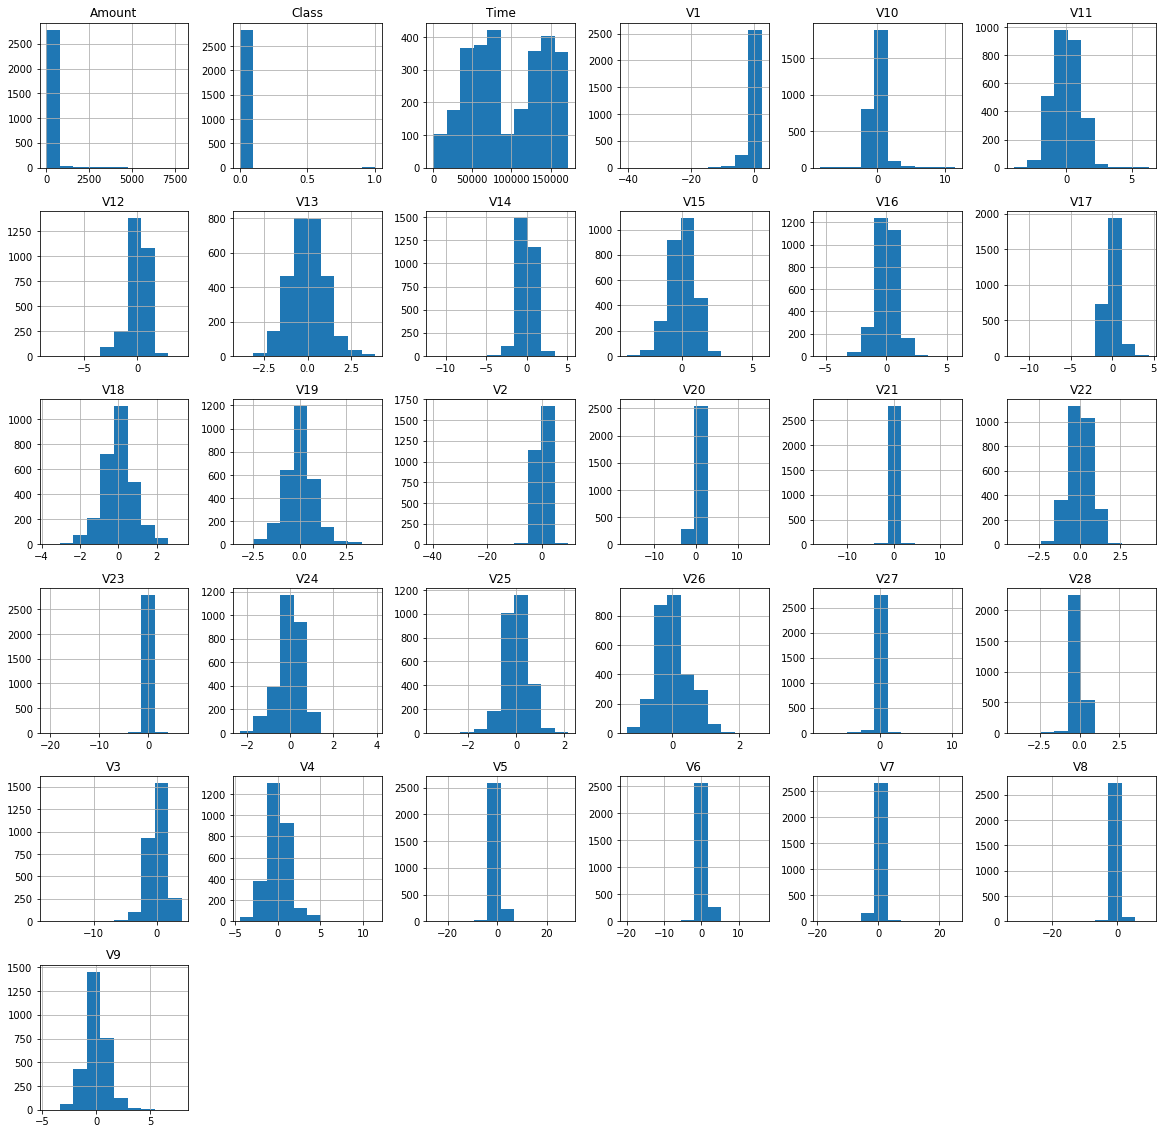

In [12]:
data.hist(figsize = (20,20))
plt.show()

In [25]:
Fraud = data[data['Class']==1]
Valid = data[data['Class']==0]


In [27]:
outlier_fraction = len(Fraud) / float(len(Valid))
print outlier_fraction
print "Fraud:", len(Fraud)
print "Valid:", len(Valid)

0.00175870559268
Fraud: 5
Valid: 2843


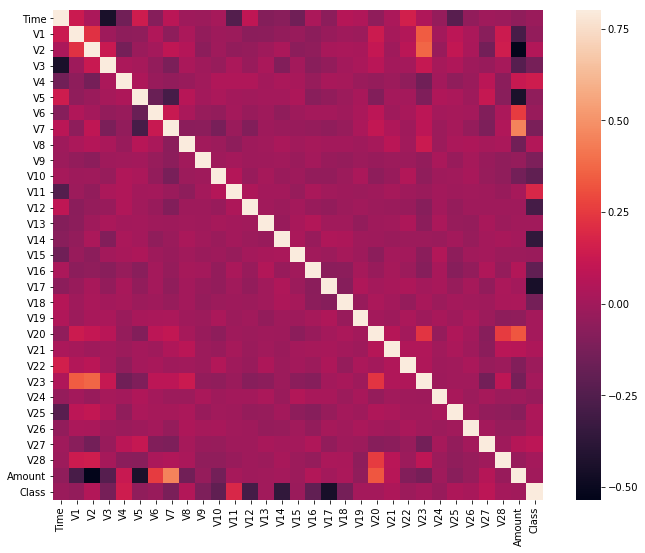

In [32]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [33]:
columns = data. columns.tolist()
columns = [c for c in columns if c not in ['Class']]
print columns

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [35]:
target = 'Class'
X = data[columns]
Y = data[target]
print X.shape
print Y.shape

(2848, 30)
(2848L,)


In [36]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [37]:
state =1
classifiers = {"Isolation Forest": IsolationForest(max_samples=len(X), contamination = outlier_fraction, random_state = state),
              "Local outlier factor": LocalOutlierFactor(n_neighbors=20, contamination = outlier_fraction)
              }

In [44]:
n_outliers = len(Fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "Local outlier factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    y_pred[y_pred == 1]=0
    y_pred[y_pred == -1]=1
    n_errors = (y_pred !=Y).sum()
    
    print('{}:{}'.format(clf_name, n_errors))
    print (accuracy_score(Y,y_pred))
    print classification_report(Y,y_pred)

Local outlier factor:11
0.996137640449
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2843
          1       0.00      0.00      0.00         5

avg / total       1.00      1.00      1.00      2848

Isolation Forest:9
0.99683988764
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2843
          1       0.17      0.20      0.18         5

avg / total       1.00      1.00      1.00      2848

